# Data Analysis

- Creazione oggetto con chiave: categoria e valore: lista di playlist nella categoria

In [ ]:
import json
import pandas as pd

categories = pd.read_csv("./categorie-playlists.csv")

categories = {
    
    x['NAME_CATEGORIES']:json.loads(x['ID_PLAYLISTS'].replace("'",'"'))
    
    for i, x in categories.iterrows()
}
categories

{'Top list': ['37i9dQZF1DXcBWIGoYBM5M',
  '37i9dQZF1DX0XUsuxWHRQd',
  '37i9dQZF1DX4dyzvuaRJ0n',
  '37i9dQZF1DXcF6B6QPhFDv',
  '37i9dQZF1DX4SBhb3fqCJd',
  '37i9dQZF1DX1lVhptIYRda',
  '37i9dQZF1DX10zKzsJ2jva',
  '37i9dQZF1DX4JAvHpjipBk',
  '37i9dQZF1DWWjGdmeTyeJ6',
  '37i9dQZEVXbIQnj7RRhdSX',
  '37i9dQZEVXbMDoHDwVN2tF',
  '37i9dQZEVXbLiRSasKsNU9',
  '37i9dQZEVXbKbvcwe5owJ1'],
 'Estate': ['37i9dQZF1DWTC6XnyUt7U3',
  '37i9dQZF1DX0Di1LOCYgoa',
  '37i9dQZF1DWVE0GbO5rNDb',
  '37i9dQZF1DX3sDhLvLnzj8',
  '37i9dQZF1DWYYgTEZK7Mhz',
  '37i9dQZF1DX2ogDiL6nZJr',
  '37i9dQZF1DXbwoaqxaoAVr',
  '37i9dQZF1DX1oKlmcvSsVe',
  '37i9dQZF1DX05r4Oy3Ln97',
  '37i9dQZF1DXaTitkvoNNxt',
  '37i9dQZF1DX9FIMhEujaK6',
  '37i9dQZF1DX4Y4RhrZqHhr',
  '37i9dQZF1DWXjv2J1ebzlh',
  '37i9dQZF1DXa8n42306eJB',
  '37i9dQZF1DXbtuVQL4zoey',
  '37i9dQZF1DWZ7eJRBxKzdO',
  '37i9dQZF1DWZSdcRHMl2tT',
  '37i9dQZF1DWUajed02NzWR',
  '37i9dQZF1DX8NMUtC3b3gL',
  '37i9dQZF1DX6ALfRKlHn1t',
  '37i9dQZF1DWVAArCxuIRGQ',
  '37i9dQZF1DX6QlnUtJCO12

- Reverse dell'oggetto precedente -> chiave: ID playlist, valore: lista di categorie a cui la playlist appartiene

In [ ]:
playlist_to_categories = {
}
for k,songs in categories.items():
    for v in songs:
        if v in playlist_to_categories:
            playlist_to_categories[v].add(k)
        else:
            playlist_to_categories[v]= set([k])
playlist_to_categories

{'37i9dQZF1DXcBWIGoYBM5M': {'Pop', 'Top list'},
 '37i9dQZF1DX0XUsuxWHRQd': {'Frequency', 'Hip Hop', 'Party', 'Top list'},
 '37i9dQZF1DX4dyzvuaRJ0n': {'Allenamento',
  'Dance/Elettronica',
  'Party',
  'Top list'},
 '37i9dQZF1DXcF6B6QPhFDv': {'Rock', 'Top list'},
 '37i9dQZF1DX4SBhb3fqCJd': {'Frequency', 'R&B', 'Top list'},
 '37i9dQZF1DX1lVhptIYRda': {'Country', 'Top list'},
 '37i9dQZF1DX10zKzsJ2jva': {'Latina', 'Top list'},
 '37i9dQZF1DX4JAvHpjipBk': {'Top list'},
 '37i9dQZF1DWWjGdmeTyeJ6': {'A casa', 'Top list'},
 '37i9dQZEVXbIQnj7RRhdSX': {'Top list'},
 '37i9dQZEVXbMDoHDwVN2tF': {'Top list'},
 '37i9dQZEVXbLiRSasKsNU9': {'Top list'},
 '37i9dQZEVXbKbvcwe5owJ1': {'Top list'},
 '37i9dQZF1DWTC6XnyUt7U3': {'Estate'},
 '37i9dQZF1DX0Di1LOCYgoa': {'Estate'},
 '37i9dQZF1DWVE0GbO5rNDb': {'Dance/Elettronica', 'Estate', 'Mood'},
 '37i9dQZF1DX3sDhLvLnzj8': {'Estate'},
 '37i9dQZF1DWYYgTEZK7Mhz': {'Estate'},
 '37i9dQZF1DX2ogDiL6nZJr': {'Estate', 'Indie', 'Viaggi'},
 '37i9dQZF1DXbwoaqxaoAVr': {'Estate

- Riscrittura dell'oggetto playlist -> tracks viene trasformato in set per rimuovere possibili doppioni

In [ ]:
read = pd.read_csv("./playlists-tracks.csv")
print(read)

# tracce = read['ID_TRACKS']

# tracce_totali = []
# for t in tracce.to_list():
#     print(t)
#     print(json.loads(t))
#     tracce_totali.append(t)
    
tracks_to_playlist = {}

playlists = [
    {
        "id": x['ID_PLAYLIST'],
        "name": x['PLAYLIST_NAME'],
        "tracks": set( 
                      json.loads(x['ID_TRACKS'].replace("'",'"'))
        )
             ,
        "count" : x['N_TRACKS']
    }
    
    for i, x in read.iterrows()
]
playlists

      Unnamed: 0             ID_PLAYLIST       PLAYLIST_NAME  \
0              0  37i9dQZF1DXcBWIGoYBM5M    Today's Top Hits   
1              1  37i9dQZF1DX0XUsuxWHRQd           RapCaviar   
2              2  37i9dQZF1DX4dyzvuaRJ0n                mint   
3              3  37i9dQZF1DXcF6B6QPhFDv           Rock This   
4              4  37i9dQZF1DX4SBhb3fqCJd            Are & Be   
...          ...                     ...                 ...   
2624        2624  37i9dQZF1DWTMD8irDo4sC     Acoustic Arabic   
2625        2625  37i9dQZF1DWUTC08ZxLjSQ  Fresh Finds Arabia   
2626        2626  37i9dQZF1DWUQM3rmTXpBR          Arab Indie   
2627        2627  37i9dQZF1DWTTCCEjVC99N     00s Arabic Hits   
2628        2628  37i9dQZF1DXaHuo0R6jTxZ     90s Arabic Hits   

                                              ID_TRACKS  N_TRACKS  TOTAL  
0     ['0WtM2NBVQNNJLh6scP13H8', '4VMRsbfZzd3SfQtaJ1...        50     50  
1     ['7aRCf5cLOFN1U7kvtChY1G', '5BmB3OaQyYXCqRyN8i...        50     50  
2     

[{'id': '37i9dQZF1DXcBWIGoYBM5M',
  'name': "Today's Top Hits",
  'tracks': {'07bsRv0pcpbG4zJeLsUs1p',
   '0HqZX76SFLDz2aW8aiqi7G',
   '0O6u0VJ46W86TxN9wgyqDj',
   '0QHEIqNKsMoOY5urbzN48u',
   '0V3wPSX9ygBnCm8psDIegu',
   '0WtM2NBVQNNJLh6scP13H8',
   '0ZxhtATQ0a6EvQNZ0z6NKV',
   '0yLdNVWF3Srea0uzk55zFn',
   '1Qrg8KqiBpW07V7PNxwwwL',
   '1Y3LN4zO1Edc2EluIoSPJN',
   '1odExI7RdWc4BT515LTAwj',
   '1xzi1Jcr7mEi9K2RfzLOqS',
   '26b3oVLrRUaaybJulow9kz',
   '2L9N0zZnd37dwF0clgxMGI',
   '2NbsBSshscKIPRG3kwBbfo',
   '2UW7JaomAMuX9pZrjVpHAU',
   '2dHHgzDwk4BJdRwy9uXhTO',
   '2i2gDpKKWjvnRTOZRhaPh2',
   '3WMj8moIAXJhHsyLaqIIHI',
   '3dnP0JxCgygwQH9Gm7q7nb',
   '3nqQXoyQOWXiESFLlDF1hG',
   '3zkyus0njMCL6phZmNNEeN',
   '4FyesJzVpA39hbYvcseO2d',
   '4LRPiXqCikLlN15c3yImP7',
   '4VMRsbfZzd3SfQtaJ1Wpwi',
   '4h9wh7iOZ0GGn8QVp4RAOB',
   '4iZ4pt7kvcaH6Yo8UoZ4s2',
   '4uUG5RXrOk84mYEfFvj3cK',
   '52Rfxu5AUNMV1qhhC2ZCkb',
   '59uQI0PADDKeE6UZDTJEe8',
   '5CM4UuQ9Gnd6K2YyKGPMoK',
   '5eTaQYBE1yrActixMAeLcZ'

- Calcolo degli edge

In [ ]:
edges = {}

for f in playlists:
    for to in playlists:
        
        edge = (f['id'], to['id'])

        # Se la canzone è la stessa, se l'edge esiste già o se il suo inverso esiste già (grafo non diretto)
        if f['id'] == to['id'] or edge in edges or (edge[1], edge[0]) in edges:
            continue
        uguali = f['tracks'] & to['tracks']
        if uguali:
            edges[edge] = len(uguali)
edges

{('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX0XUsuxWHRQd'): 3,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4dyzvuaRJ0n'): 1,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4SBhb3fqCJd'): 2,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX1lVhptIYRda'): 1,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX10zKzsJ2jva'): 4,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4JAvHpjipBk'): 1,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbIQnj7RRhdSX'): 2,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbMDoHDwVN2tF'): 20,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbLiRSasKsNU9'): 5,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbKbvcwe5owJ1'): 5,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DWTC6XnyUt7U3'): 2,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX1oKlmcvSsVe'): 1,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4Y4RhrZqHhr'): 3,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DWZ7eJRBxKzdO'): 3,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX6wfQutivYYr'): 8,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX6K3mlB5G3WG'): 7,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX5Vy6DFOcx00'): 13,
 ('37i9dQZF1

In [ ]:
edges_directional = {}

for f in playlists:
    for to in playlists:
        
        edge = (f['id'], to['id'])

        # Se la canzone è la stessa, se l'edge esiste già
        if f['id'] == to['id'] or edge in edges_directional:
            continue
        uguali = f['tracks'] & to['tracks']
        if uguali:
            edges_directional[edge] = len(uguali)/len(f['tracks'])
edges_directional

{('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX0XUsuxWHRQd'): 0.06,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4dyzvuaRJ0n'): 0.02,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4SBhb3fqCJd'): 0.04,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX1lVhptIYRda'): 0.02,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX10zKzsJ2jva'): 0.08,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4JAvHpjipBk'): 0.02,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbIQnj7RRhdSX'): 0.04,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbMDoHDwVN2tF'): 0.4,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbLiRSasKsNU9'): 0.1,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZEVXbKbvcwe5owJ1'): 0.1,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DWTC6XnyUt7U3'): 0.04,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX1oKlmcvSsVe'): 0.02,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX4Y4RhrZqHhr'): 0.06,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DWZ7eJRBxKzdO'): 0.06,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX6wfQutivYYr'): 0.16,
 ('37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX6K3mlB5G3WG'): 0.14,
 ('37i9dQZF1DXcBWIGoYBM5M',

- Tra tutte le categorie di una playlist prendo quella più popolata

In [ ]:
import numpy as np

def greatest_category(cat):
    cat = list(cat)
    return cat[np.argmax(
        [
            len(categories[x]) for x in cat
        ]
    )]

greatest_category({"Gaming","Estate"})

'Gaming'

- Creazione grafo

In [ ]:
import networkx as nx

g = nx.Graph()
for p in playlists:
    g.add_node(
        p['id'],
        label = p['name'],
        amount = p['count'], # Numero di tracks nella playlist
        category = greatest_category(playlist_to_categories[p['id']])
    )

for e,w in edges.items():
    g.add_edge(e[0], e[1], weight = w)

In [ ]:
g_d = nx.DiGraph()
for p in playlists:
    g_d.add_node(
        p['id'],
        label = p['name'],
        amount = p['count'], # Numero di tracks nella playlist
        category = greatest_category(playlist_to_categories[p['id']])
    )
for e,w in edges_directional.items():
    g_d.add_edge(e[0], e[1], weight = w)


- Numero di nodi e di edge

In [ ]:
print(f"playlist:{len(playlists)} edges:{len(edges.keys())}")
print(f"""
Nodi: {g.order()}
Edges: {g.size()}
""")

playlist:2629 edges:32276

Nodi: 1848
Edges: 32276



# Analisi

- Analisi del grado

In [ ]:
import scipy as sp
grado = [ val for x, val in g.degree()]
print(f"Grado\n\t media: {np.mean(grado)}\n\t max: {max(grado)}\n\t min: {min(grado)}\n\t moda: {sp.stats.mode(grado,keepdims = True).mode[0]}\n\t mediana: {np.median(grado)}\n\t deviazione standard: {np.std(grado)}")

Grado
	 media: 34.93073593073593
	 max: 262
	 min: 0
	 moda: 0
	 mediana: 20.0
	 deviazione standard: 40.43635862182208


- Densità

In [ ]:
density = nx.density(g)
print(f'Density: {density}')

Density: 0.018912147228335643


- Componenti connesse

In [ ]:
cc = [x for x in nx.connected_components(g) if len(x) > 1]

print(f'Grafo connesso? {nx.is_connected(g)}')
print(f'Numero componenti connesse: {nx.number_connected_components(g)}')
print(f'Numero di componenti connesse con len > 1:{len(cc)}')
print("Grandezza delle 6 componenti connesse:")
for x in nx.connected_components(g):
    if len(x) > 1:
        print(f'\t{len(x)}')


Grafo connesso? False
Numero componenti connesse: 87
Numero di componenti connesse con len > 1:7
Grandezza delle 6 componenti connesse:
	1720
	2
	37
	2
	2
	3
	2


- Viene aggiunto l'attributo "cc" (componente connessa) ai nodi

In [ ]:
for i, c in enumerate(cc):
    for p in c:
        g.nodes[p]['cc'] = i
        g_d.nodes[p]['cc'] = i
        

- Centralità

- Degree centrality

In [ ]:
degree_centrality = nx.degree_centrality(g)
#degree_centrality

deg_cent = pd.Series(degree_centrality)
deg_cent.sort_values(ascending=False)
print(deg_cent)
deg_cent.max()


37i9dQZF1DXcBWIGoYBM5M    0.109367
37i9dQZF1DX0XUsuxWHRQd    0.038441
37i9dQZF1DX4dyzvuaRJ0n    0.058473
37i9dQZF1DXcF6B6QPhFDv    0.025447
37i9dQZF1DX4SBhb3fqCJd    0.037358
                            ...   
37i9dQZF1DWTMD8irDo4sC    0.002707
37i9dQZF1DWUTC08ZxLjSQ    0.002707
37i9dQZF1DWUQM3rmTXpBR    0.003790
37i9dQZF1DWTTCCEjVC99N    0.000541
37i9dQZF1DXaHuo0R6jTxZ    0.001083
Length: 1848, dtype: float64


0.14185165132647537

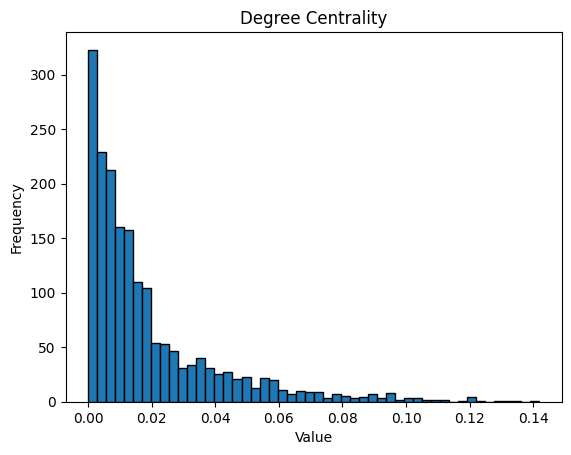

In [ ]:
import matplotlib.pyplot as plt

# create a histogram
plt.hist(deg_cent, bins=50, edgecolor='black')

# add axis labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Degree Centrality')

# display the plot
plt.show()

- Closeness centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(g)
#closeness_centrality

clos_cent = pd.Series(closeness_centrality)
clos_cent.sort_values(ascending=False)
clos_cent.max()

0.3978787866139153

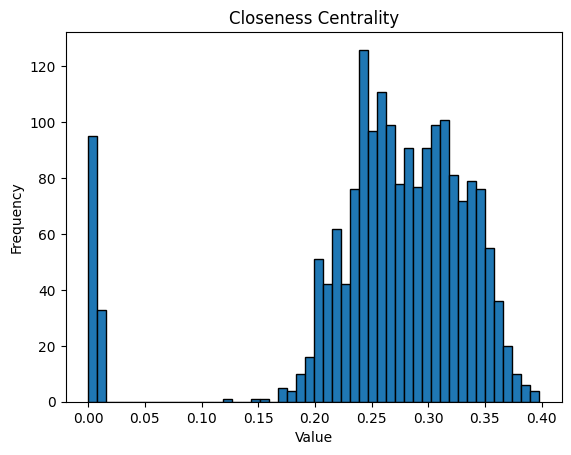

In [ ]:
# create a histogram
plt.hist(clos_cent, bins=50, edgecolor='black')

# add axis labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Closeness Centrality')

# display the plot
plt.show()

- Betweenness centrality

In [ ]:
betweenness_centrality=nx.betweenness_centrality(g)
#betweenness_centrality

bet_cent = pd.Series(betweenness_centrality)
bet_cent.sort_values(ascending=False)
bet_cent.max()

0.03300303888632567

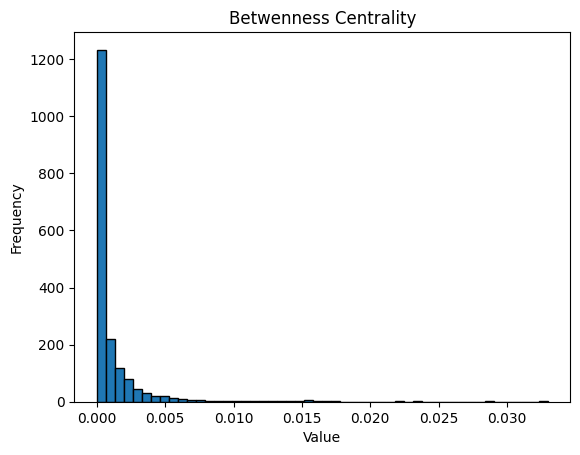

In [ ]:
# create a histogram
plt.hist(bet_cent, bins=50, edgecolor='black')

# add axis labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Betwenness Centrality')

# display the plot
plt.show()

- Eigenvector centrality

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(g, 200)
#eigenvector_centrality

eig_cent = pd.Series(eigenvector_centrality)
eig_cent.sort_values(ascending=False)
eig_cent.max()

0.11821506521143009

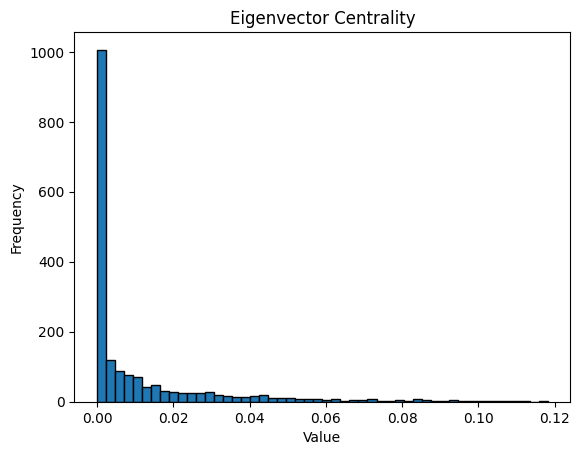

In [ ]:
# create a histogram
plt.hist(eig_cent, bins=50, edgecolor='black')

# add axis labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Eigenvector Centrality')

# display the plot
plt.show()

- Distribuzione del grado

- PDF

0.003246753246753247


Text(0, 0.5, 'P(X=x)')

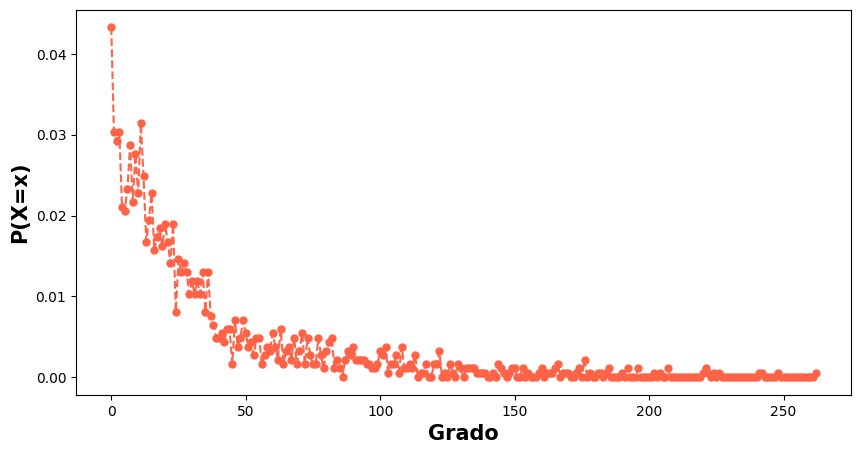

In [ ]:
import matplotlib.pyplot as plt

np.arange(min(grado),max(grado)+1)
count,bins = np.histogram(grado, bins=np.arange(min(grado),max(grado)+2))
pdf_g = count / g.order()
print(pdf_g[100])
fig = plt.figure(figsize=(10,5)) 
plt.plot(bins[:-1],pdf_g, color='tomato',marker='o', linestyle='--', ms=5)
plt.xlabel('Grado',size=15, weight = 'bold')
plt.ylabel('P(X=x)',size=15, weight = 'bold')

- CDF

Text(0, 0.5, 'P(X<=x)')

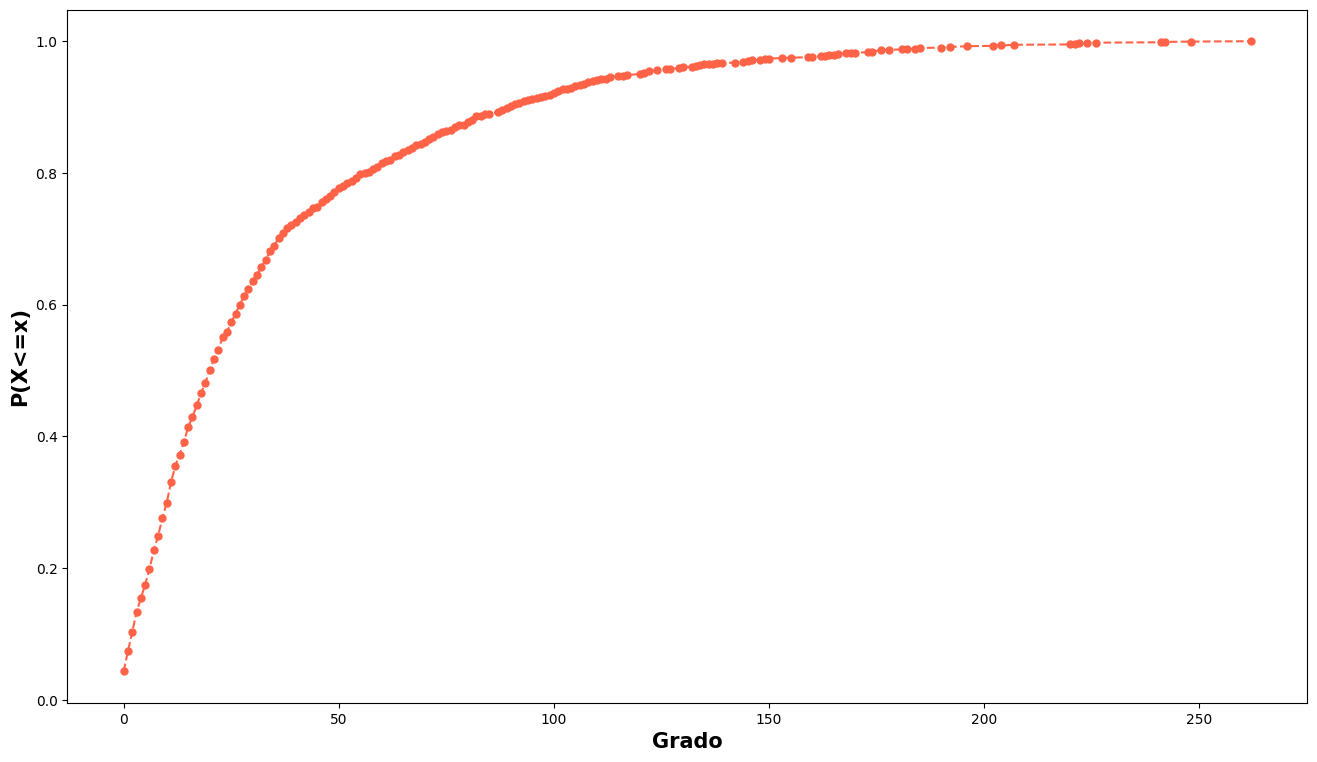

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf_function = ECDF(grado)
x = np.unique(grado)
y = cdf_function(x)

# Visualizzazione
fig_cdf_function = plt.figure(figsize=(16,9))
assi = fig_cdf_function.gca()
#assi.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
assi.plot(x,y,color = 'tomato', linestyle = '--', marker= 'o',ms = 5)
assi.set_xlabel('Grado',size=15, weight = 'bold')
assi.set_ylabel('P(X<=x)',size=15, weight = 'bold')

- CCDF

Text(0, 0.5, 'P(X>x)')

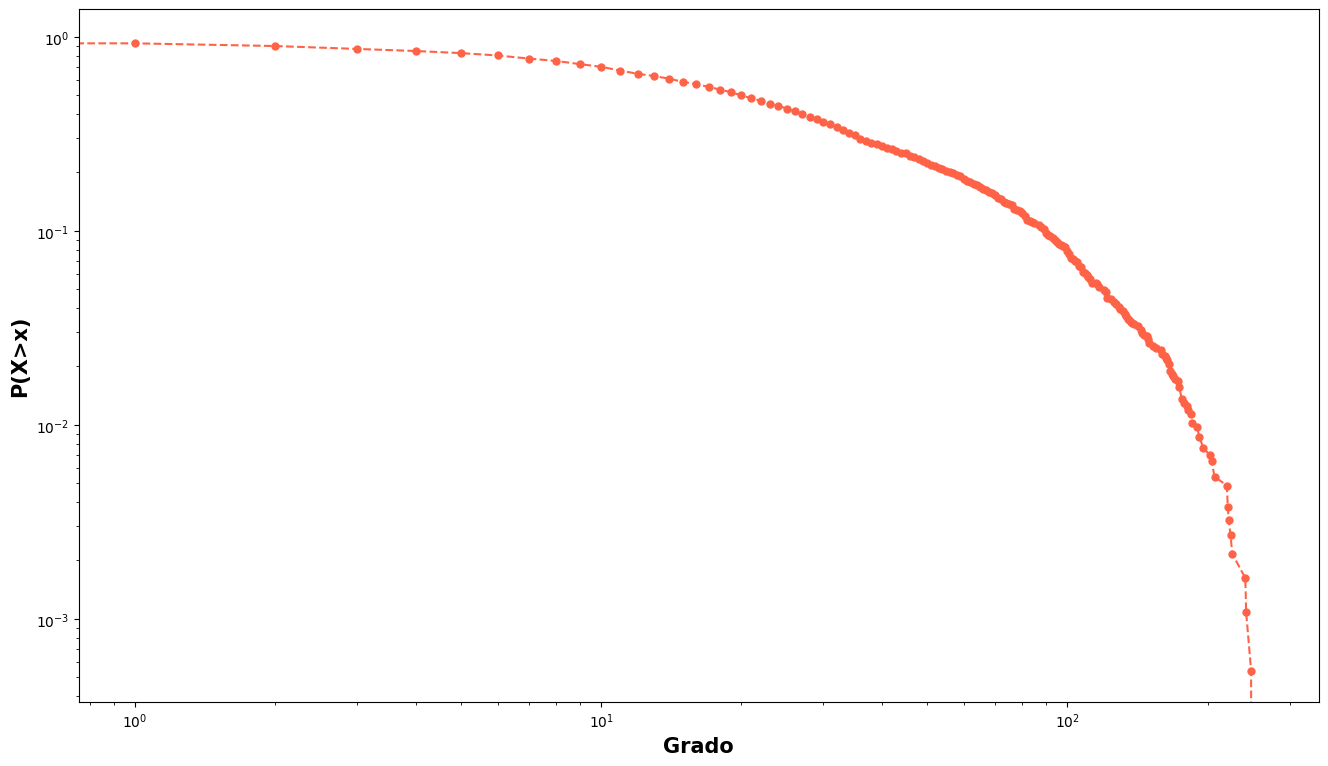

In [ ]:
cdf_function = ECDF(grado)
x = np.unique(grado)
y = cdf_function(x)

# Visualizzazione
fig_cdf_function = plt.figure(figsize=(16,9))
assi = fig_cdf_function.gca()
assi.loglog(x,1-y,color = 'tomato', linestyle = '--', marker= 'o',ms = 5)
assi.set_xlabel('Grado',size=15, weight = 'bold')
assi.set_ylabel('P(X>x)',size=15, weight = 'bold')

- Identificazione degli hub

In [ ]:
percentile_99 = np.percentile(grado,99)
print(percentile_99)

187.64999999999986


In [ ]:
hub_nodi = [k for k,v in g.degree() if v>= percentile_99]
print(len(hub_nodi))
print(list(hub_nodi))

19
['37i9dQZF1DXcBWIGoYBM5M', '37i9dQZF1DX5Vy6DFOcx00', '37i9dQZF1DX5gGGog0N2Tu', '37i9dQZF1DX0ckkFHFOpuK', '37i9dQZF1DWYBO1MoTDhZI', '37i9dQZF1DWVPKP49DU8tu', '37i9dQZF1DX5HvC37O9DNe', '37i9dQZF1DWT888el8RDPq', '37i9dQZF1DWYRNXjFoiid2', '37i9dQZF1DX3WvGXE8FqYX', '37i9dQZF1DX76Wlfdnj7AP', '37i9dQZF1DWWMOmoXKqHTD', '37i9dQZF1DWUxHPh2rEiHr', '37i9dQZF1DWUZMtnnlvJ9p', '37i9dQZF1DWVbkD5H6XTxy', '37i9dQZF1DXdL3FdP7fH1n', '37i9dQZF1DWXti3N4Wp5xy', '37i9dQZF1DXbJasLnGlZqY', '37i9dQZF1DWSThc8QnzIme']


- Assortatività

- In base al grado

In [ ]:
nx.degree_assortativity_coefficient(g)

0.33995267377774097

- In base all'attributo "category"

In [ ]:
nx.attribute_assortativity_coefficient(g, "category")

0.21648803642975062

In [ ]:
#nx.gexf.write_gexf(g, "grafo_playlist_categories_cc.gexf")
nx.gexf.write_gexf(g_d, "grafo_completo.gexf")

# Osservazioni

- Valutare a quali categorie è connessa la componente connessa composta da 37 nodi

In [ ]:
c = cc[2]
for ca in cc:
    if len(ca) == 37:
        c = ca
        break

playlist = c
single_p = list(playlist)[0]
#playlist_to_categories[single_p]
greatest_category(playlist_to_categories[single_p])


'Benessere'

In [ ]:
c1 = cc[0]
for ca in cc:
    if len(ca) == 1720:
        c1 = ca
        break

playlist = c1
single_p = list(playlist)[0]
#playlist_to_categories[single_p]
greatest_category(playlist_to_categories[single_p])

'R&B'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1948b23-b32b-472b-ad62-8675137e81fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>